***Goal:***
* Find any correlation between stock activity and shipment volume for: Walmart (WMT), eBay (EBAY), Amazon (AMZN)
* Pull stock closing values from APIs
* Include helpful plots
* Include interpretation of results

***Output:***
* Correlation Coefficient Table of X(i,j)
* i=stock, j=seller, X=corr.coef.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries

### Importing Shipping Dataset

In [2]:
# Import data
url = "https://raw.githubusercontent.com/Galanopoulog/Shimpent/master/shipments_data.csv"
ships = pd.read_csv(url)
ships = ships.rename(index=str, columns={"shipdate": "date"})
ships = ships.sort_values(by=['date'])
ships.head()

,seller_hash,shipmentid,voided,date
17817,-971513923887404724,176863087,False,2017-01-03
15474,-971513923887404724,176864225,False,2017-01-03
16010,-971513923887404724,176867115,False,2017-01-03
437,-971513923887404724,176608264,False,2017-01-03
4654,-971513923887404724,176605316,False,2017-01-03


### Inputting Stock Prices from Alpha Vantage
#### Stocks include Walmart (WMT), eBay (EBAY), Amazon (AMZN)
Retain only the volume and closing prices for each company

In [3]:
# Walmart
ts = TimeSeries(key='0P2P4ICMDFT3CEGY', output_format='pandas')
Wdata, meta_data = ts.get_daily(symbol='WMT', outputsize='full')
Wdata = Wdata.iloc[:,0:2]
Wdata = Wdata.rename(index=str, columns={"5. volume": "volume", "4. close": "close"})
Wdata.reset_index(level=0, inplace=True)
print(Wdata.head())

         date     volume  close
0  1995-01-03  5703600.0  20.88
1  1995-01-04  3893900.0  21.38
2  1995-01-05  4815800.0  21.88
3  1995-01-06  4310300.0  22.13
4  1995-01-09  2277500.0  21.88


In [4]:
# eBay
Edata, meta_data = ts.get_daily(symbol='EBAY', outputsize='full')
Edata = Edata.iloc[:,0:2]
Edata = Edata.rename(index=str, columns={"5. volume": "volume", "4. close": "close"})
Edata.reset_index(level=0, inplace=True)
print(Edata.head())

         date     volume  close
0  1998-09-24  9095400.0  47.38
1  1998-09-25  2126400.0  44.88
2  1998-09-28  1574300.0  48.25
3  1998-09-29   689000.0  48.88
4  1998-09-30   773600.0  45.06


In [5]:
# Amazon
Adata, meta_data = ts.get_daily(symbol='AMZN', outputsize='full')
Adata = Adata.iloc[:,0:2]
Adata = Adata.rename(index=str, columns={"5. volume": "volume", "4. close": "close"})
Adata.reset_index(level=0, inplace=True)
print(Adata.head())

         date     volume  close
0  1997-05-15  5713300.0  23.50
1  1997-05-16  1225000.0  20.75
2  1997-05-19   508900.0  20.50
3  1997-05-20   455600.0  19.63
4  1997-05-21  1571100.0  17.13


Merge the shipping dataset with the the stock prices of each company. That way, we know the stock price and volume for each date there was a shipment.

         date      volume  close         seller_hash  shipmentid voided
0  2017-01-03  10473162.0  68.66 -971513923887404724   176863087  False
1  2017-01-03  10473162.0  68.66 -971513923887404724   176864225  False
2  2017-01-03  10473162.0  68.66 -971513923887404724   176867115  False
3  2017-01-03  10473162.0  68.66 -971513923887404724   176608264  False
4  2017-01-03  10473162.0  68.66 -971513923887404724   176605316  False


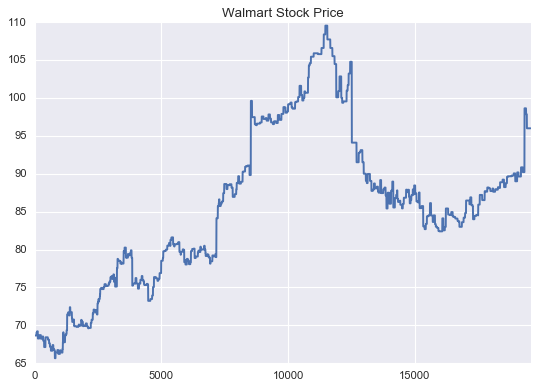

In [6]:
# Walmart
Wmerge = pd.merge(Wdata, ships, on='date', how='inner')
print(Wmerge.head())
Wmerge['close'].plot()
plt.title('Walmart Stock Price')

         date     volume  close         seller_hash  shipmentid voided
0  2017-01-03  7665031.0  29.84 -971513923887404724   176863087  False
1  2017-01-03  7665031.0  29.84 -971513923887404724   176864225  False
2  2017-01-03  7665031.0  29.84 -971513923887404724   176867115  False
3  2017-01-03  7665031.0  29.84 -971513923887404724   176608264  False
4  2017-01-03  7665031.0  29.84 -971513923887404724   176605316  False


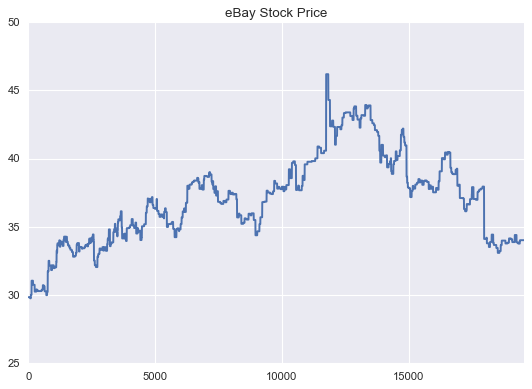

In [7]:
# eBay
Emerge = pd.merge(Edata, ships, on='date', how='inner')
print(Emerge.head())
Emerge['close'].plot()
plt.title('eBay Stock Price')

         date     volume   close         seller_hash  shipmentid voided
0  2017-01-03  3521066.0  753.67 -971513923887404724   176863087  False
1  2017-01-03  3521066.0  753.67 -971513923887404724   176864225  False
2  2017-01-03  3521066.0  753.67 -971513923887404724   176867115  False
3  2017-01-03  3521066.0  753.67 -971513923887404724   176608264  False
4  2017-01-03  3521066.0  753.67 -971513923887404724   176605316  False


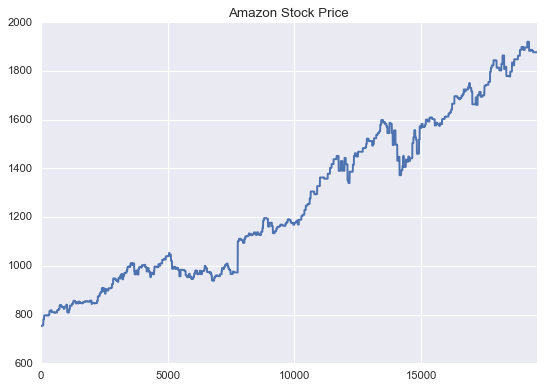

In [8]:
# Amazon
Amerge = pd.merge(Adata, ships, on='date', how='inner')
print(Amerge.head())
Amerge['close'].plot()
plt.title('Amazon Stock Price')

Before proceeding with calculating correlation, we're just looking to see some descriptive statistics for each stock.

             volume         close   seller_hash    shipmentid
count  1.956600e+04  19566.000000  1.956600e+04  1.956600e+04
mean   9.598755e+06     85.600061  3.678346e+18  2.396241e+08
std    6.821172e+06     10.353528  4.580793e+18  4.487263e+07
min    4.149954e+06     65.660000 -9.715139e+17  1.056766e+08
25%    6.448652e+06     78.520000 -9.715139e+17  2.112752e+08
50%    8.105589e+06     86.050000  1.031684e+18  2.440934e+08
75%    1.001200e+07     90.850000  8.699639e+18  2.729116e+08
max    5.605130e+07    109.550000  8.699639e+18  3.125951e+08


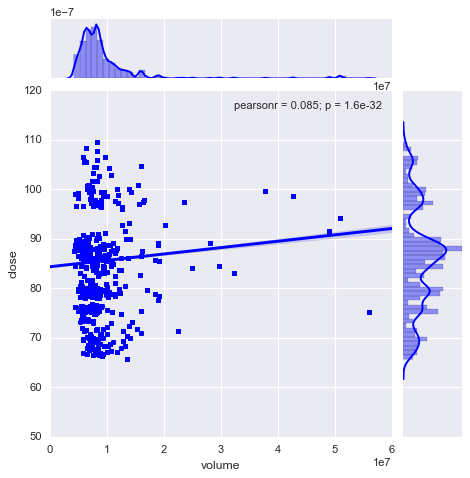

In [9]:
# Walmart
print(Wmerge.describe())
sns.jointplot(data=Wmerge, x='volume', y='close', kind='reg', color='b')
plt.show()

             volume         close   seller_hash    shipmentid
count  1.956600e+04  19566.000000  1.956600e+04  1.956600e+04
mean   9.339578e+06     36.987908  3.678346e+18  2.396241e+08
std    4.801112e+06      3.264003  4.580793e+18  4.487263e+07
min    3.123070e+06     29.760000 -9.715139e+17  1.056766e+08
25%    6.679908e+06     34.270000 -9.715139e+17  2.112752e+08
50%    8.306041e+06     37.040000  1.031684e+18  2.440934e+08
75%    1.071069e+07     38.860000  8.699639e+18  2.729116e+08
max    5.097804e+07     46.190000  8.699639e+18  3.125951e+08


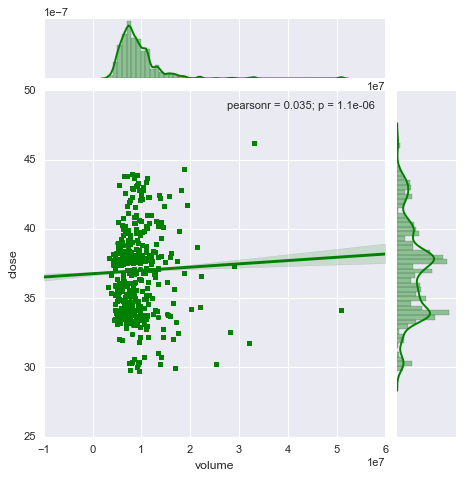

In [10]:
# eBay
print(Emerge.describe())
sns.jointplot(data=Emerge, x='volume', y='close', kind='reg', color='g')
plt.show()

             volume         close   seller_hash    shipmentid
count  1.956600e+04  19566.000000  1.956600e+04  1.956600e+04
mean   4.240342e+06   1267.960276  3.678346e+18  2.396241e+08
std    2.093526e+06    333.434862  4.580793e+18  4.487263e+07
min    1.553997e+06    753.670000 -9.715139e+17  1.056766e+08
25%    2.860718e+06    972.910000 -9.715139e+17  2.112752e+08
50%    3.637302e+06   1179.140000  1.031684e+18  2.440934e+08
75%    5.056764e+06   1571.680000  8.699639e+18  2.729116e+08
max    1.636053e+07   1919.650000  8.699639e+18  3.125951e+08


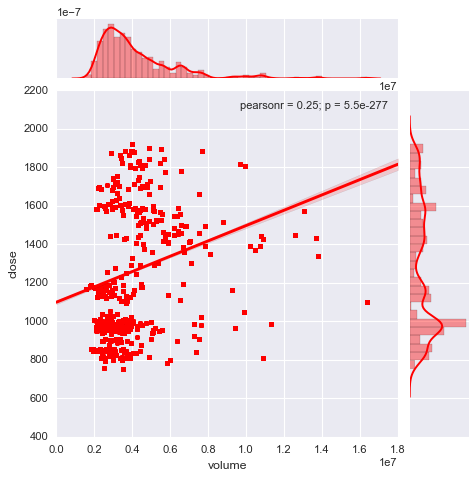

In [11]:
# Amazon
print(Amerge.describe())
sns.jointplot(data=Amerge, x='volume', y='close', kind='reg', color='r')
plt.show()

### Volume/Stock Price Correlation

Here, the focus lies primarily with the correlation between the stock's closing value and the volume. Despite the shipmentid showing a relationship with closing price, the slight significance is misleading and not of import since shipmentid is a character and not a numerical value.

In [12]:
# Walmart
Wcorr = Wmerge.corr()
Wcorr.style.background_gradient()

In [13]:
# eBay
Ecorr = Emerge.corr()
Ecorr.style.background_gradient()

In [14]:
# Amazon
Acorr = Amerge.corr()
Acorr.style.background_gradient()

#### Correlation Coefficient Table

In [15]:
W = Wmerge.iloc[:,0:3]
E = Emerge.iloc[:,0:3]
A = Amerge.iloc[:,0:3]
WE = pd.merge(W, E, on='date', how='inner')

In [16]:
WEA = pd.merge(WE, A, on='date', how='inner')
WEA.head()

,date,volume_x,close_x,volume_y,close_y,volume,close
0,2017-01-03,10473162.0,68.66,7665031.0,29.84,3521066.0,753.67
1,2017-01-03,10473162.0,68.66,7665031.0,29.84,3521066.0,753.67
2,2017-01-03,10473162.0,68.66,7665031.0,29.84,3521066.0,753.67
3,2017-01-03,10473162.0,68.66,7665031.0,29.84,3521066.0,753.67
4,2017-01-03,10473162.0,68.66,7665031.0,29.84,3521066.0,753.67


In [17]:
WEAc = WEA.corr()
WEAc.style.background_gradient()

#### Conclusions



* The stock that appears to have consistently increased over time is Amazon
* A linear relationship between volume and closing price does not exist between any stocks (even after log-transforming volume)
* The strongest correlation exists between closing price of eBay and Walmart
* All correlation coefficients are positive, so with an increase in one price/volume of one stock, the price/volume of another stock increases